In [86]:
import pandas as pd
import numpy as np
import matplotlib.pyplot as plt
import seaborn as sns
from sklearn.model_selection import train_test_split, GridSearchCV
from sklearn.preprocessing import StandardScaler, LabelEncoder
from sklearn.metrics import accuracy_score, classification_report, confusion_matrix, mean_absolute_error
from sklearn.svm import SVC
from sklearn.inspection import permutation_importance
from scipy.stats import zscore
from sklearn.linear_model import LogisticRegression
from sklearn.model_selection import train_test_split ,learning_curve
from sklearn.linear_model import LinearRegression
from sklearn.preprocessing import StandardScaler
from sklearn.metrics import mean_squared_error, r2_score
from sklearn.model_selection import train_test_split, RandomizedSearchCV
from sklearn.ensemble import RandomForestRegressor
from sklearn.preprocessing import StandardScaler, LabelEncoder, PolynomialFeatures
from sklearn.compose import ColumnTransformer
from sklearn.pipeline import Pipeline
from sklearn.metrics import mean_squared_error, r2_score
from sklearn.preprocessing import OneHotEncoder
from sklearn.model_selection import train_test_split
from sklearn.linear_model import LinearRegression
from sklearn.preprocessing import StandardScaler, LabelEncoder, OneHotEncoder
from sklearn.metrics import mean_squared_error, r2_score
from sklearn.preprocessing import PowerTransformer
from sklearn.decomposition import PCA
from sklearn.metrics import accuracy_score


from sklearn.cluster import KMeans

# **Discovering The Data**

In [2]:
# Load the dataset
df = pd.read_csv('/content/Spotify-dataset.csv',low_memory=False)
pd.set_option('display.max_rows', None)

# Display dataset info
df.info()


<class 'pandas.core.frame.DataFrame'>
RangeIndex: 114000 entries, 0 to 113999
Data columns (total 21 columns):
 #   Column            Non-Null Count   Dtype  
---  ------            --------------   -----  
 0   index             114000 non-null  int64  
 1   track_id          114000 non-null  object 
 2   artists           113999 non-null  object 
 3   album_name        113999 non-null  object 
 4   track_name        113999 non-null  object 
 5   popularity        114000 non-null  int64  
 6   duration_ms       114000 non-null  int64  
 7   explicit          114000 non-null  bool   
 8   danceability      114000 non-null  float64
 9   energy            114000 non-null  float64
 10  key               114000 non-null  int64  
 11  loudness          114000 non-null  float64
 12  mode              114000 non-null  int64  
 13  speechiness       114000 non-null  float64
 14  acousticness      114000 non-null  float64
 15  instrumentalness  114000 non-null  float64
 16  liveness          11

In [3]:
print("\nPreview:")
print(df.head())


Preview:
   index                track_id                 artists  \
0      0  5SuOikwiRyPMVoIQDJUgSV             Gen Hoshino   
1      1  4qPNDBW1i3p13qLCt0Ki3A            Ben Woodward   
2      2  1iJBSr7s7jYXzM8EGcbK5b  Ingrid Michaelson;ZAYN   
3      3  6lfxq3CG4xtTiEg7opyCyx            Kina Grannis   
4      4  5vjLSffimiIP26QG5WcN2K        Chord Overstreet   

                                          album_name  \
0                                             Comedy   
1                                   Ghost (Acoustic)   
2                                     To Begin Again   
3  Crazy Rich Asians (Original Motion Picture Sou...   
4                                            Hold On   

                   track_name  popularity  duration_ms  explicit  \
0                      Comedy          73       230666     False   
1            Ghost - Acoustic          55       149610     False   
2              To Begin Again          57       210826     False   
3  Can't Help Fallin

In [4]:
print("\nThe Shape: ", df.shape)


The Shape:  (114000, 21)


# **Cleaning Data**

## **Nulls**

In [5]:
print("\nNull values per column:")
print(df.isnull().sum())
print('\n')
print("\nPercentage of nulls per column:")
print(df.isnull().mean() * 100)


Null values per column:
index               0
track_id            0
artists             1
album_name          1
track_name          1
popularity          0
duration_ms         0
explicit            0
danceability        0
energy              0
key                 0
loudness            0
mode                0
speechiness         0
acousticness        0
instrumentalness    0
liveness            0
valence             0
tempo               0
time_signature      0
track_genre         0
dtype: int64



Percentage of nulls per column:
index               0.000000
track_id            0.000000
artists             0.000877
album_name          0.000877
track_name          0.000877
popularity          0.000000
duration_ms         0.000000
explicit            0.000000
danceability        0.000000
energy              0.000000
key                 0.000000
loudness            0.000000
mode                0.000000
speechiness         0.000000
acousticness        0.000000
instrumentalness    0.000000
l

In [6]:
numerical_cols = ['popularity', 'duration_ms', 'danceability', 'energy', 'loudness', 'speechiness',
                  'acousticness', 'instrumentalness', 'liveness', 'valence', 'tempo', 'key', 'mode', 'time_signature']
for col in numerical_cols:
    if col in df.columns:
        df[col] = df[col].fillna(df[col].mean())

In [7]:
categorical_cols = ['track_genre', 'explicit', 'artists', 'album_name']
for col in categorical_cols:
    if col in df.columns:
        df[col] = df[col].fillna(df[col].mode()[0])

### **Dropping Nulls**

In [8]:
df.dropna(inplace=True)


## **Duplicates**

In [9]:
df.nunique()

,0
index,113999
track_id,89740
artists,31437
album_name,46589
track_name,73608
popularity,101
duration_ms,50696
explicit,2
danceability,1174
energy,2083


### Normal Check

In [10]:
print("\nNumber of duplicate rows:", df.duplicated().sum())
df = df.drop_duplicates()


Number of duplicate rows: 0


### Discovery

In [11]:
df.nunique()

,0
index,113999
track_id,89740
artists,31437
album_name,46589
track_name,73608
popularity,101
duration_ms,50696
explicit,2
danceability,1174
energy,2083


**This tells us the following**

1.   Large Number of Duplicatted Ids
2.   Duplication in track_name after Checking with Unique Ids



In [12]:
duplicate_subset = df.duplicated(subset=['track_id', 'track_name', 'artists']).sum()
print(f"Number of duplicates based on track_id, track_name, and artists: {duplicate_subset}")



Number of duplicates based on track_id, track_name, and artists: 24259


In [13]:
# Sort by popularity (descending) to prioritize highest popularity
df.sort_values(by='popularity', ascending=False, inplace=True)

# Drop duplicates in place, keeping the first occurrence (highest popularity)
df.drop_duplicates(subset=['track_id', 'track_name', 'artists'], keep='first', inplace=True)

# Verify
print(f"Rows after dropping duplicates: {len(df)}")
print("Remaining duplicates:", df.duplicated(subset=['track_id', 'track_name', 'artists']).sum())


Rows after dropping duplicates: 89740
Remaining duplicates: 0


### **Advanced Checking For Duplicates**

In [14]:
# Step 1: Identify duplicates based on track_name and artists
duplicates = df[df.duplicated(subset=['track_name', 'artists'], keep=False)].copy()

# Step 2: Filter duplicates where at least one instance has popularity = 0
duplicates['is_zero_popularity'] = duplicates['popularity'] == 0
grouped = duplicates.groupby(['track_name', 'artists'])

In [15]:
# Step 3: Find duplicates with both popularity = 0 and higher popularity
problematic_duplicates = []
numerical_cols = ['duration_ms', 'danceability', 'energy', 'loudness', 'speechiness',
                  'acousticness', 'instrumentalness', 'liveness', 'valence', 'tempo']
indices_to_drop = []
for (track_name, artists), group in grouped:
    if group['popularity'].eq(0).any() and group['popularity'].gt(0).any():
        group = group.sort_values('popularity', ascending=False)
        max_pop_row = group[group['popularity'] > 0].iloc[0]
        zero_pop_rows = group[group['popularity'] == 0]
        track_ids_info = []
        for idx, zero_row in zero_pop_rows.iterrows():
            diffs = {col: abs(max_pop_row[col] - zero_row[col]) for col in numerical_cols}
            significant_diffs = {col: diff for col, diff in diffs.items() if diff > 0.05 * abs(max_pop_row[col])}
            track_ids_info.append({
                'track_id': zero_row['track_id'],
                'popularity': zero_row['popularity'],
                'significant_differences': str(significant_diffs) if significant_diffs else 'None '
            })
            # Mark rows with no significant differences for dropping
            if not significant_diffs:
                indices_to_drop.append(idx)
        # Add the highest popularity track_id
        track_ids_info.append({
            'track_id': max_pop_row['track_id'],
            'popularity': max_pop_row['popularity'],
            'significant_differences': 'Reference'
        })
        problematic_duplicates.append({
            'track_name': track_name,
            'artists': artists,
            'track_ids_info': track_ids_info
        })

In [16]:
# Step 4: Display first 10 problematic duplicates in a concise format
if problematic_duplicates:
    print("First 10 duplicates with popularity = 0 and higher popularity:")
    for entry in problematic_duplicates[:10]:
        print(f"\nSong: {entry['track_name']} by {entry['artists']}")
        print("\nTrack IDs and differences:")
        for info in entry['track_ids_info']:
            print(f"  track_id: {info['track_id']}, popularity: {info['popularity']}, differences: {info['significant_differences']}")
else:
    print("No duplicates found with popularity = 0 and higher popularity.")

First 10 duplicates with popularity = 0 and higher popularity:

Song: 'Til You Can't by Cody Johnson

Track IDs and differences:
  track_id: 7CzUkV2dSe5WwM4apgSIhK, popularity: 0, differences: None 
  track_id: 5huByJCSYO88ozJcs4p8co, popularity: 0, differences: None 
  track_id: 2eDNes32ixF4zZnBcRgIAw, popularity: 0, differences: None 
  track_id: 2JerUEDYblFmPzZjLs4a1z, popularity: 0, differences: None 
  track_id: 0mTSm4MqhfSwCwDnQqABKk, popularity: 1, differences: Reference

Song: 'Zat You, Santa Claus? - Single Version by Louis Armstrong;The Commanders

Track IDs and differences:
  track_id: 3OUZApNQz6hKXFh2F3nb3X, popularity: 0, differences: None 
  track_id: 7ElJ25XMKSHWkjpEwiFsV5, popularity: 0, differences: None 
  track_id: 3I5umalOFMMtgC2LfC56Uk, popularity: 0, differences: None 
  track_id: 7boMvoKAVwhb2SQOey89EI, popularity: 0, differences: None 
  track_id: 34SGmn1mPnpAj1sRKYQGUH, popularity: 0, differences: None 
  track_id: 13SCCInc8juRiBgAH2309G, popularity: 1, differe

In [17]:
# Step 5: Drop duplicates with popularity = 0 and no significant differences
df.drop(indices_to_drop, inplace=True)

# Step 6: Check After Dropping
print(f"Rows after dropping duplicates: {len(df)}")

Rows after dropping duplicates: 87604


## **Outliers**

### **Displaying Outliers**

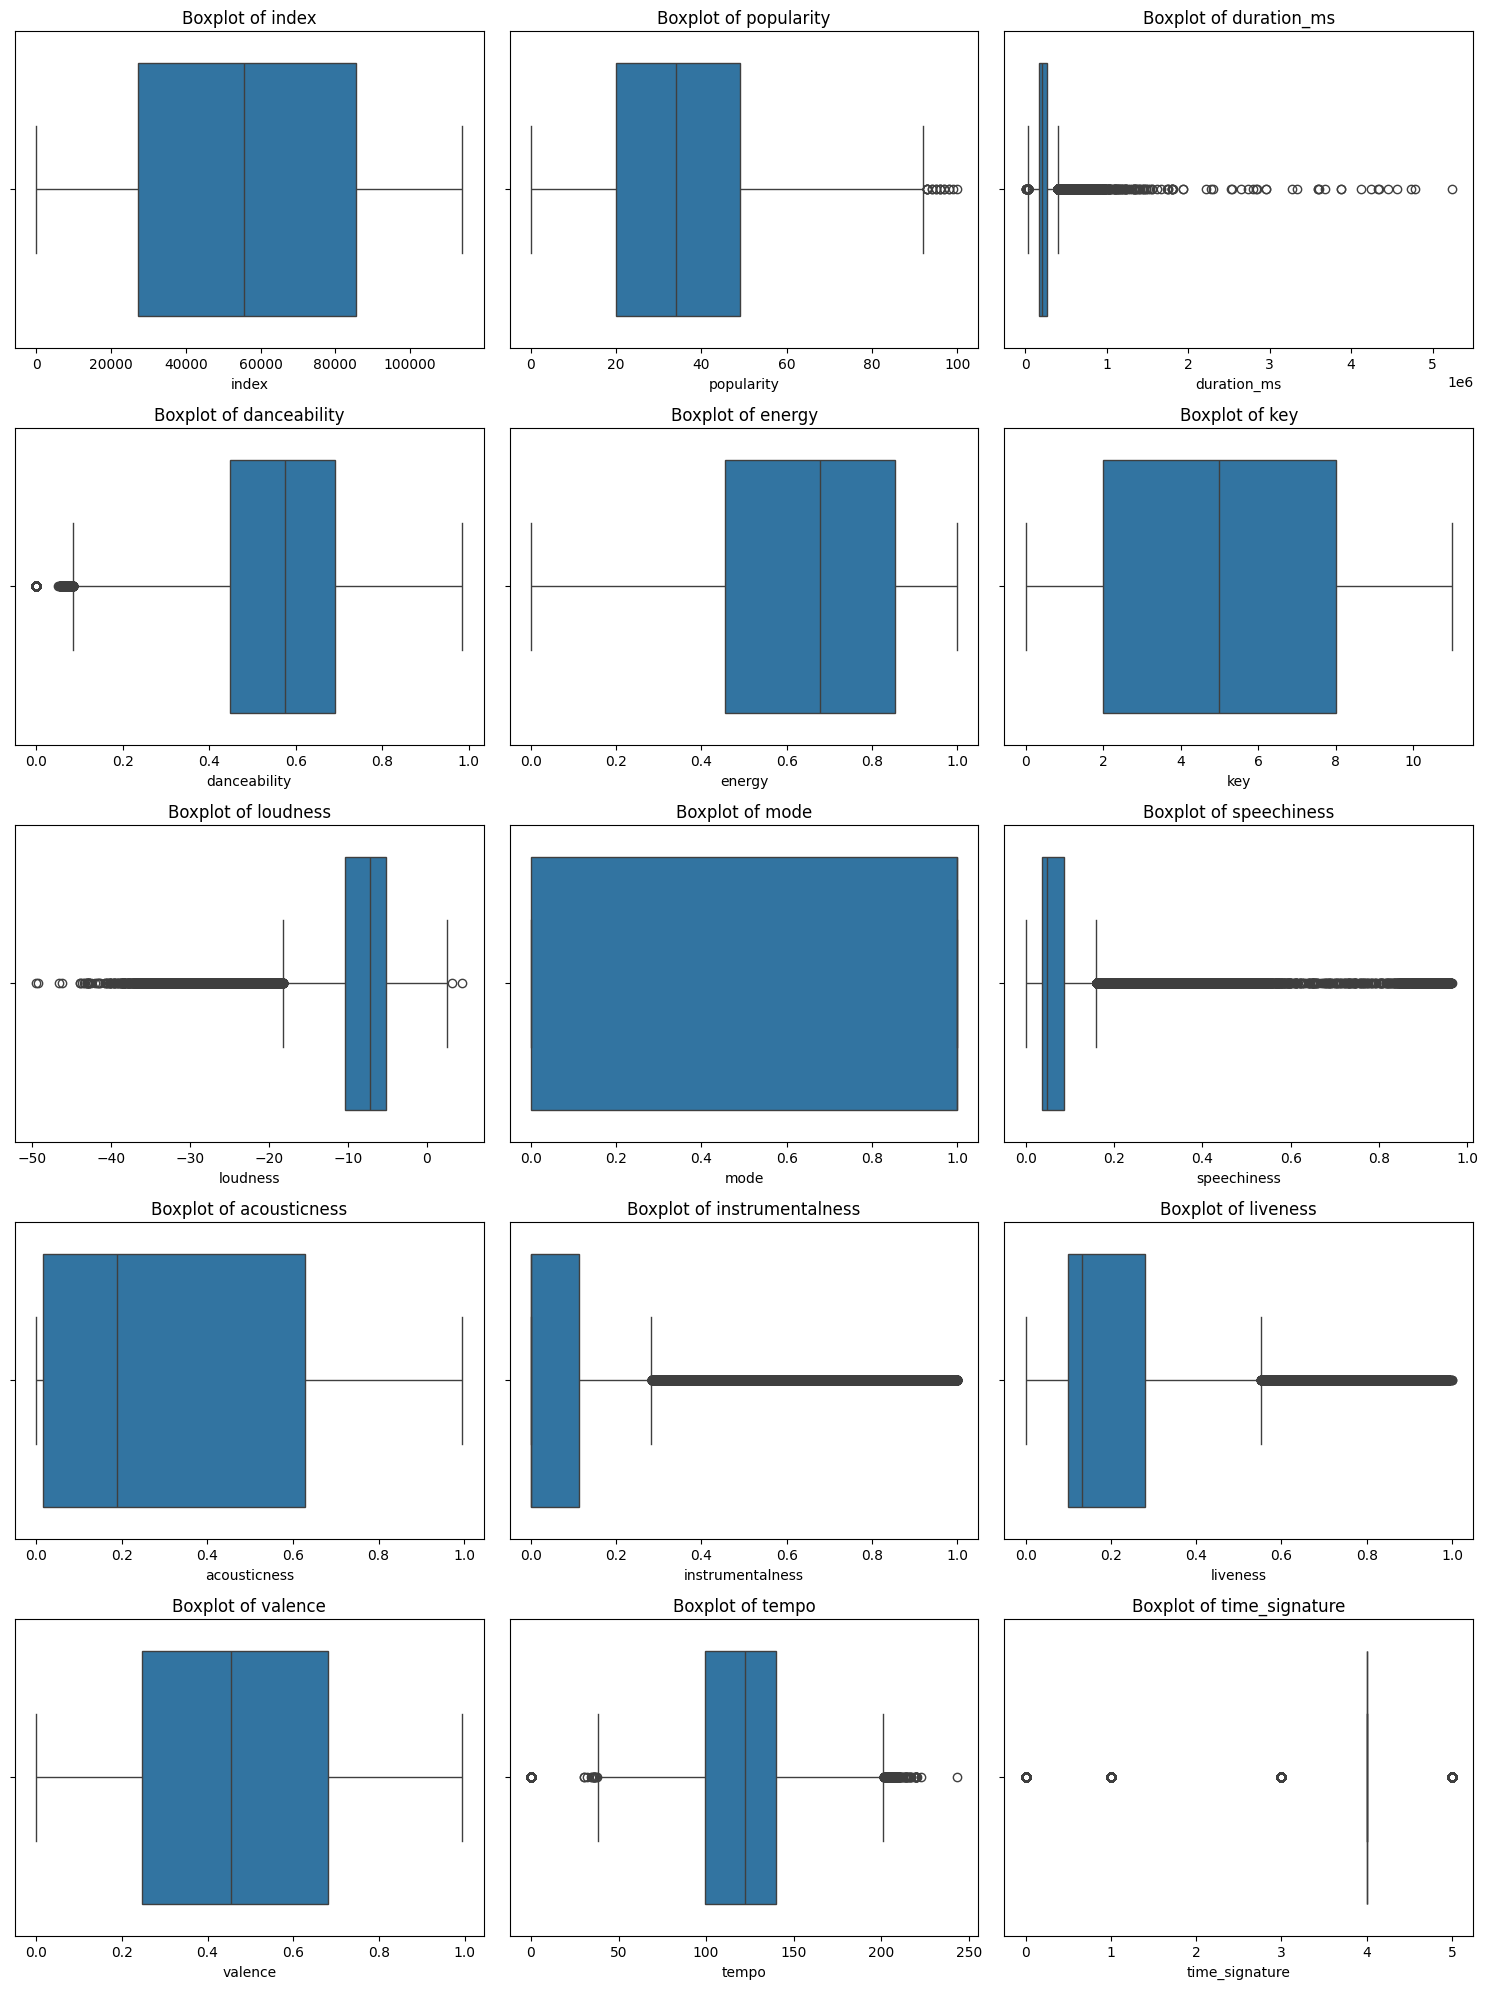

In [18]:
# all numerical columns
numerical_cols = [col for col in df.columns if df[col].dtype in ['int64', 'float64']]
cols_per_row = 3
rows_needed = (len(numerical_cols) + cols_per_row - 1) // cols_per_row

numerical_cols_for_outliers = [col for col in numerical_cols if col not in ['popularity', 'duration_ms']]

# Subplot
fig, axes = plt.subplots(nrows=rows_needed, ncols=cols_per_row, figsize=(15, rows_needed * 4))
axes = axes.flatten()

# boxplot for each column
for i, col in enumerate(numerical_cols):
    sns.boxplot(x=df[col], ax=axes[i])
    axes[i].set_title(f'Boxplot of {col}')
    axes[i].grid(False)

# hiding extra axes if less charts present
for j in range(i + 1, len(axes)):
    fig.delaxes(axes[j])

plt.tight_layout()
plt.show()

### **Handling**

In [19]:
for col in numerical_cols_for_outliers:
    Q1 = df[col].quantile(0.25)
    Q3 = df[col].quantile(0.75)
    IQR = Q3 - Q1
    lower_limit = Q1 - 1.5 * IQR
    upper_limit = Q3 + 1.5 * IQR
    df[col] = np.where(df[col] < lower_limit, lower_limit, df[col])
    df[col] = np.where(df[col] > upper_limit, upper_limit, df[col])

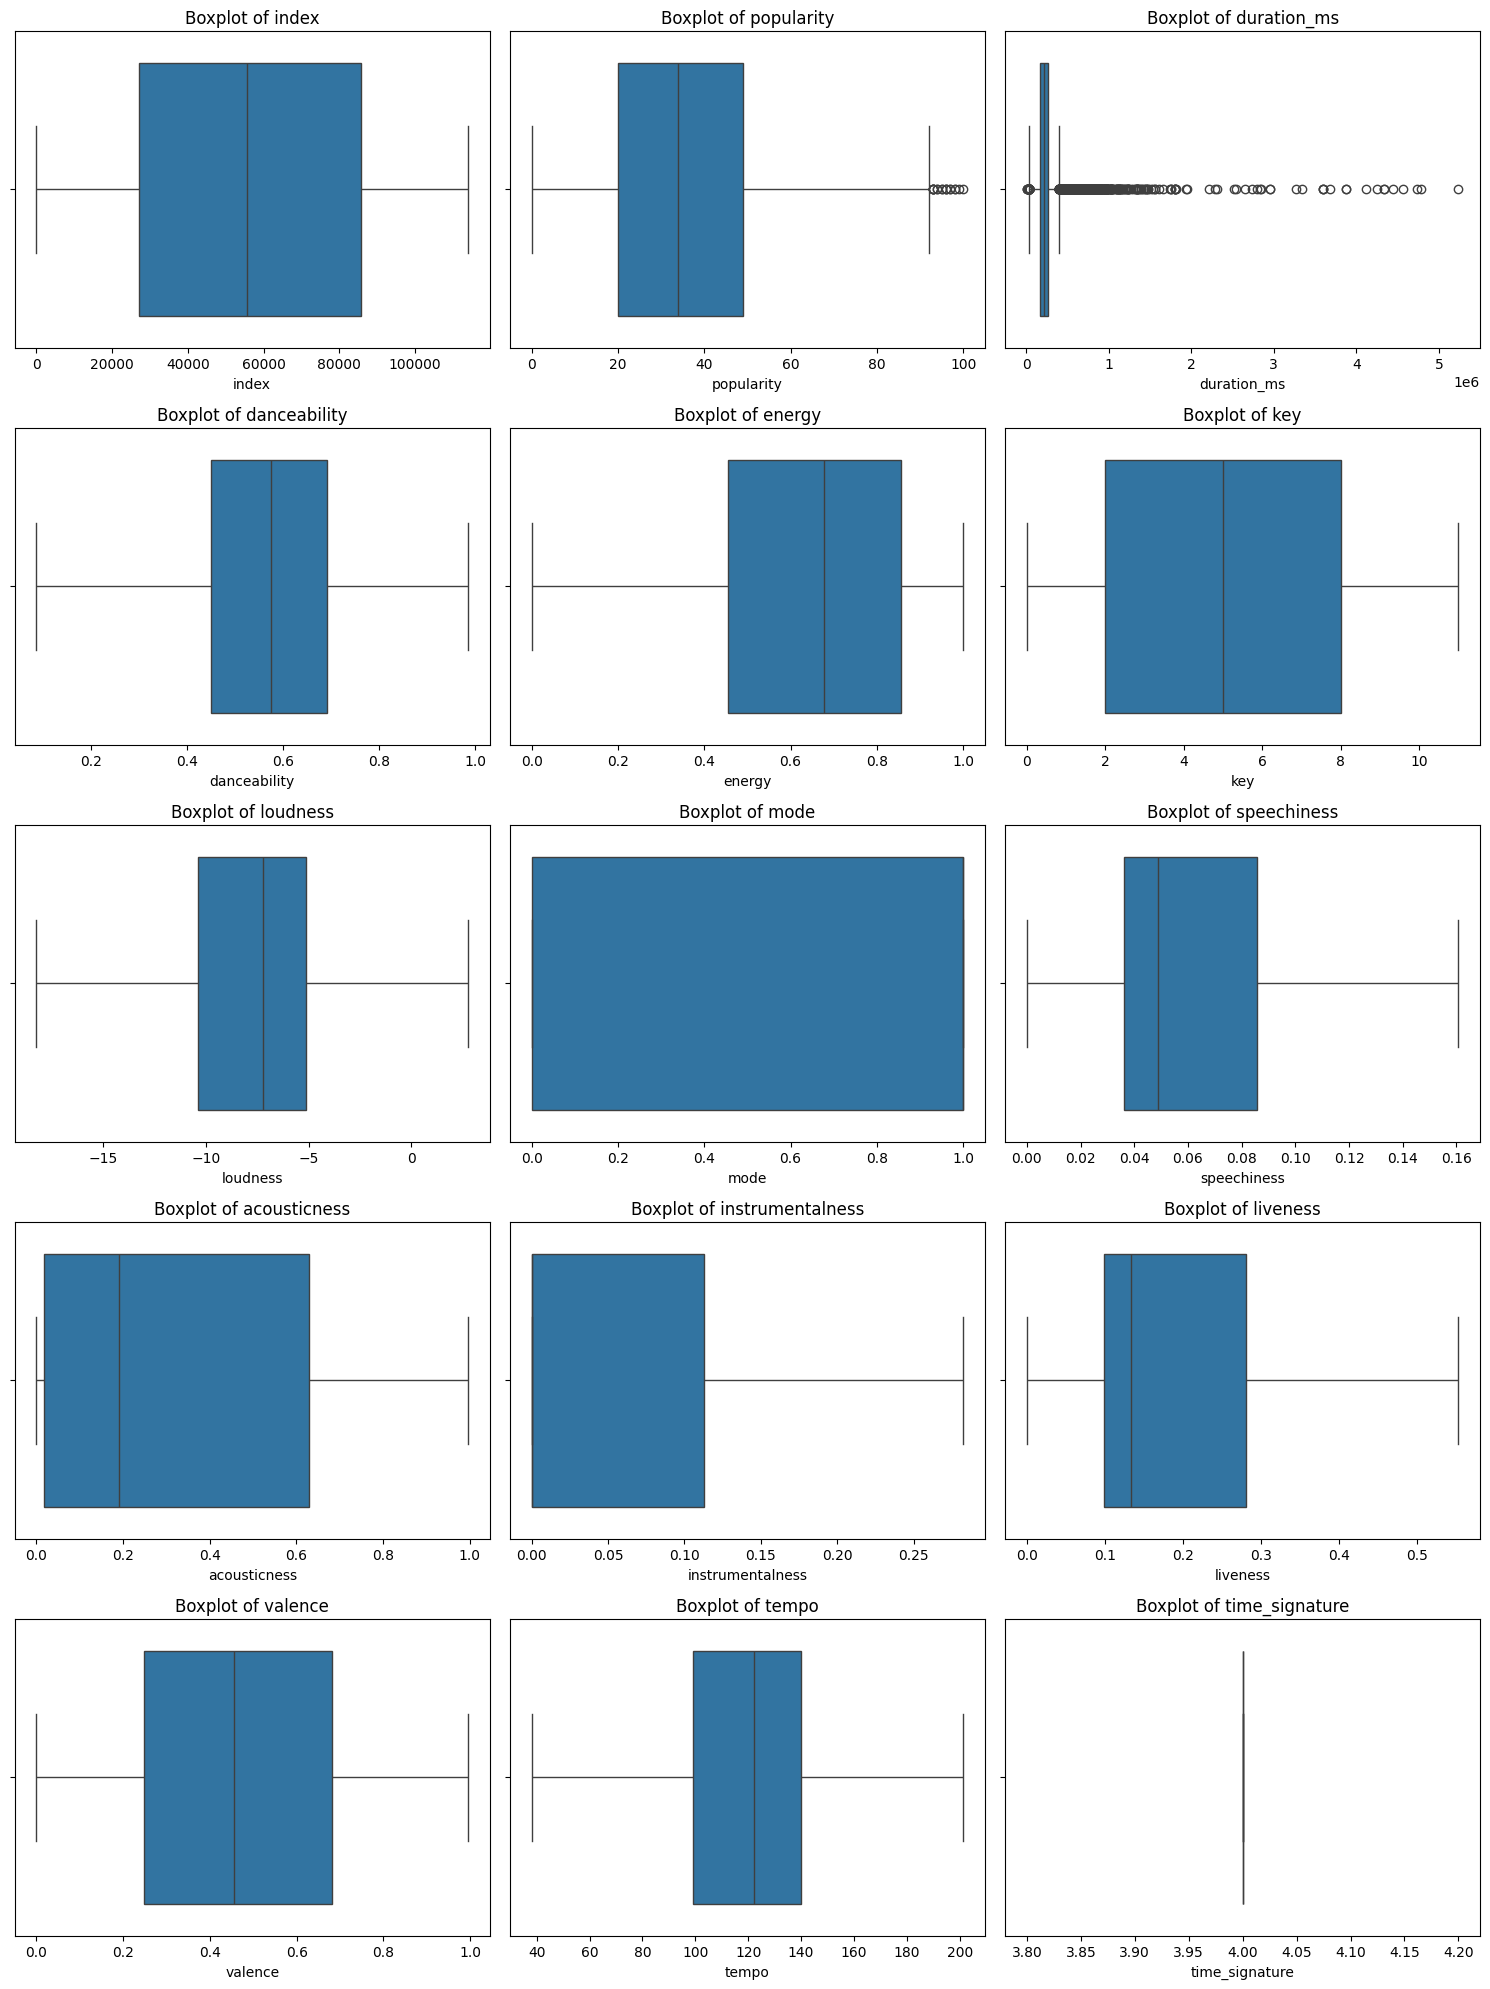

In [20]:
fig, axes = plt.subplots(nrows=rows_needed, ncols=cols_per_row, figsize=(15, rows_needed * 4))
axes = axes.flatten()


for i, col in enumerate(numerical_cols):
    sns.boxplot(x=df[col], ax=axes[i])
    axes[i].set_title(f'Boxplot of {col}')
    axes[i].grid(False)

for j in range(i + 1, len(axes)):
    fig.delaxes(axes[j])

plt.tight_layout()
plt.show()

We kept Pouplarity Outliers as it is a factor in how the model should predict the outcome (Normally some songs are far better and more popular than others )

# **Data Analysis and Visualization**

In [21]:
df['track_genre'].unique()

array(['dance', 'hip-hop', 'reggae', 'edm', 'latino', 'reggaeton',
       'latin', 'pop', 'piano', 'alt-rock', 'chill', 'rock', 'folk',
       'groove', 'songwriter', 'progressive-house', 'indie', 'country',
       'spanish', 'garage', 'metal', 'k-pop', 'indie-pop', 'house',
       'indian', 'soul', 'synth-pop', 'emo', 'alternative', 'punk',
       'trance', 'electro', 'grunge', 'sleep', 'techno', 'british',
       'hard-rock', 'pagode', 'german', 'funk', 'singer-songwriter',
       'j-pop', 'dancehall', 'sad', 'swedish', 'acoustic', 'brazil',
       'r-n-b', 'punk-rock', 'blues', 'pop-film', 'disco', 'hardcore',
       'french', 'ambient', 'chicago-house', 'psych-rock', 'children',
       'j-dance', 'industrial', 'jazz', 'j-rock', 'ska', 'anime',
       'power-pop', 'salsa', 'turkish', 'deep-house', 'rock-n-roll',
       'electronic', 'comedy', 'afrobeat', 'show-tunes', 'metalcore',
       'party', 'rockabilly', 'death-metal', 'cantopop', 'disney',
       'classical', 'guitar', 'mando

In [22]:
genre_popularity_df =  df.groupby(['track_genre'])['popularity'].mean().sort_values().reset_index(name='popularity_mean')
genre_popularity_df.tail()

,track_genre,popularity_mean
109,pop,54.011765
110,chill,55.899338
111,pop-film,58.244172
112,metal,58.368293
113,k-pop,59.263158


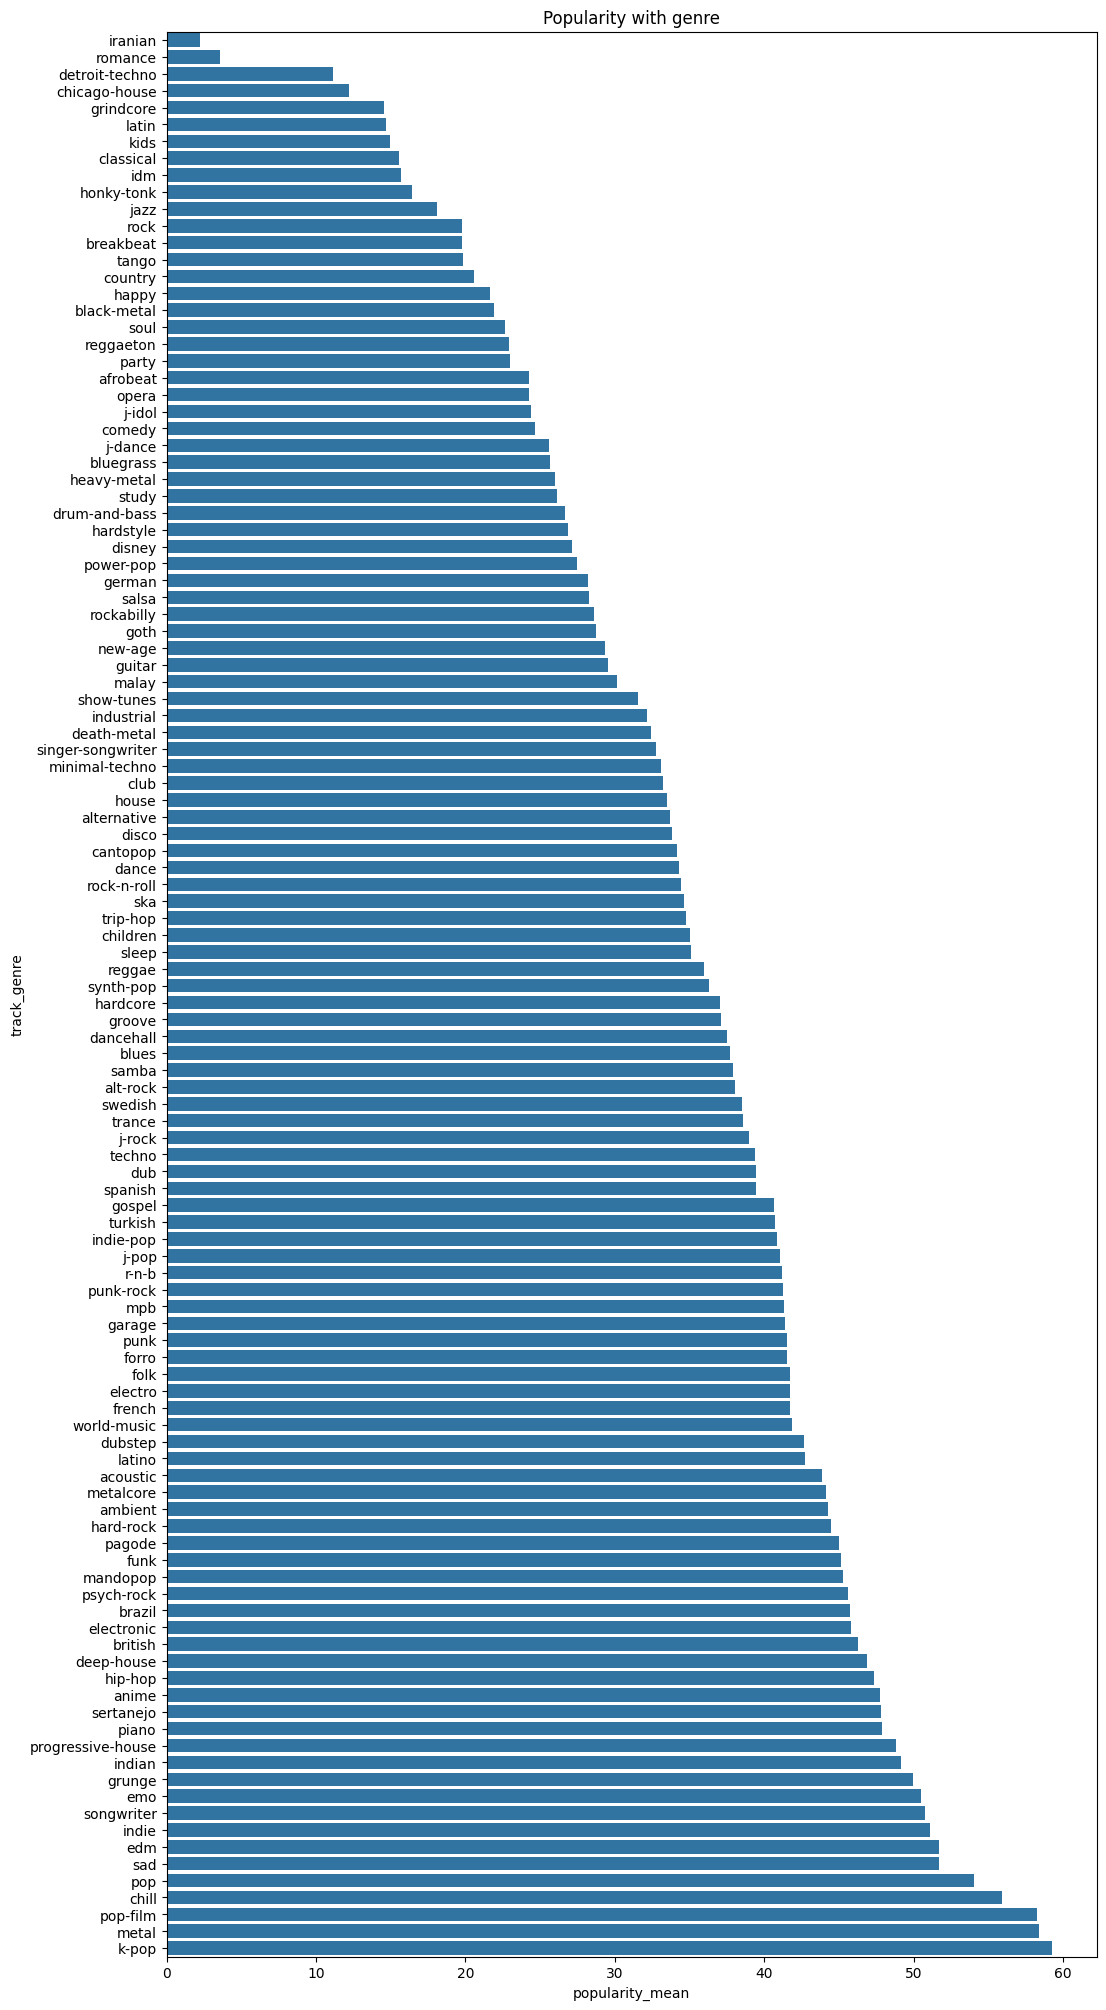

In [23]:
plt.figure(figsize=(12, 25))

sns.barplot(
    data=genre_popularity_df,
    y='track_genre',
    x='popularity_mean',
)
plt.title("Popularity with genre")
plt.show()

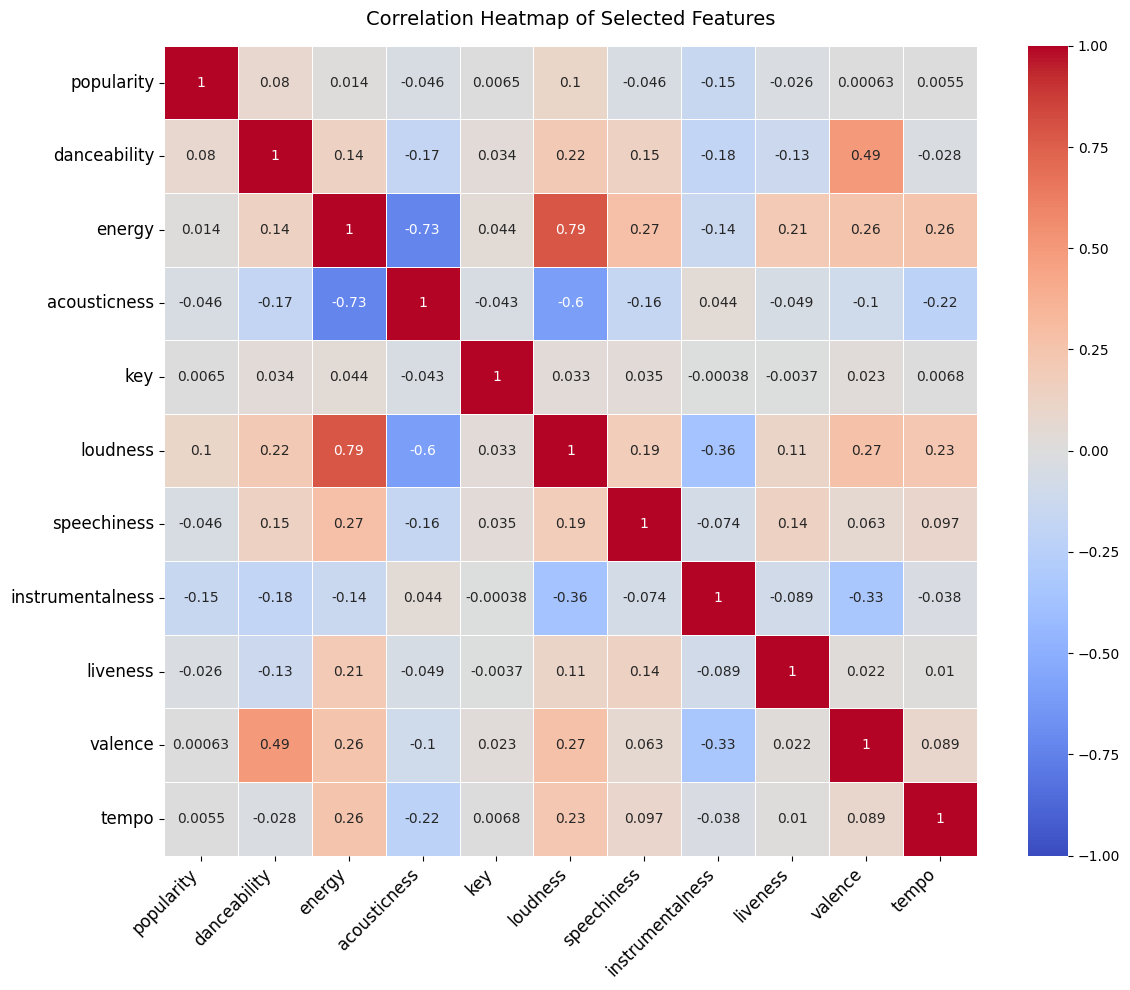

In [24]:
plt.figure(figsize=(12, 10))
sns.heatmap(df[['popularity', 'danceability', 'energy', 'acousticness' , 'key' , 'loudness','speechiness' , 'instrumentalness','liveness','valence','tempo']].corr(),
             annot=True, cmap='coolwarm', vmin=-1, vmax=1, linewidths=0.5)
plt.title('Correlation Heatmap of Selected Features', fontsize=14, pad=15)
plt.xticks(rotation=45, ha='right', fontsize=12)
plt.yticks(fontsize=12)
plt.tight_layout()
plt.show()

In [25]:
df['loudness'].describe()

,loudness
count,87604.000000
mean,-8.207654
std,4.212844
min,-18.256000
25%,-10.375000
50%,-7.216000
75%,-5.121000
max,2.760000


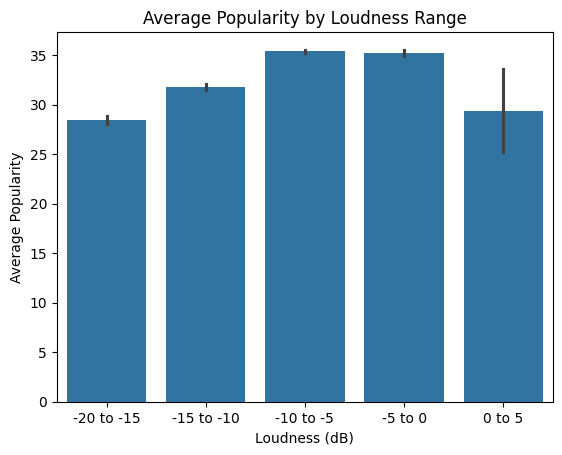

In [26]:
bins = [-20, -15, -10, -5, 0, 5]
labels = ['-20 to -15', '-15 to -10', '-10 to -5', '-5 to 0', '0 to 5']

df['loudness_bins'] = pd.cut(df['loudness'], bins=bins, labels=labels)


sns.barplot(x='loudness_bins', y='popularity', data=df, estimator='mean')
plt.title('Average Popularity by Loudness Range')
plt.ylabel('Average Popularity')
plt.xlabel('Loudness (dB)')
plt.show()

/tmp/ipython-input-2594207012.py:15: MatplotlibDeprecationWarning: The 'labels' parameter of boxplot() has been renamed 'tick_labels' since Matplotlib 3.9; support for the old name will be dropped in 3.11.
  bp = axes[row, col].boxplot(box_data, labels=top_genres, patch_artist=True)
/tmp/ipython-input-2594207012.py:15: MatplotlibDeprecationWarning: The 'labels' parameter of boxplot() has been renamed 'tick_labels' since Matplotlib 3.9; support for the old name will be dropped in 3.11.
  bp = axes[row, col].boxplot(box_data, labels=top_genres, patch_artist=True)
/tmp/ipython-input-2594207012.py:15: MatplotlibDeprecationWarning: The 'labels' parameter of boxplot() has been renamed 'tick_labels' since Matplotlib 3.9; support for the old name will be dropped in 3.11.
  bp = axes[row, col].boxplot(box_data, labels=top_genres, patch_artist=True)
/tmp/ipython-input-2594207012.py:15: MatplotlibDeprecationWarning: The 'labels' parameter of boxplot() has been renamed 'tick_labels' since Matplotl

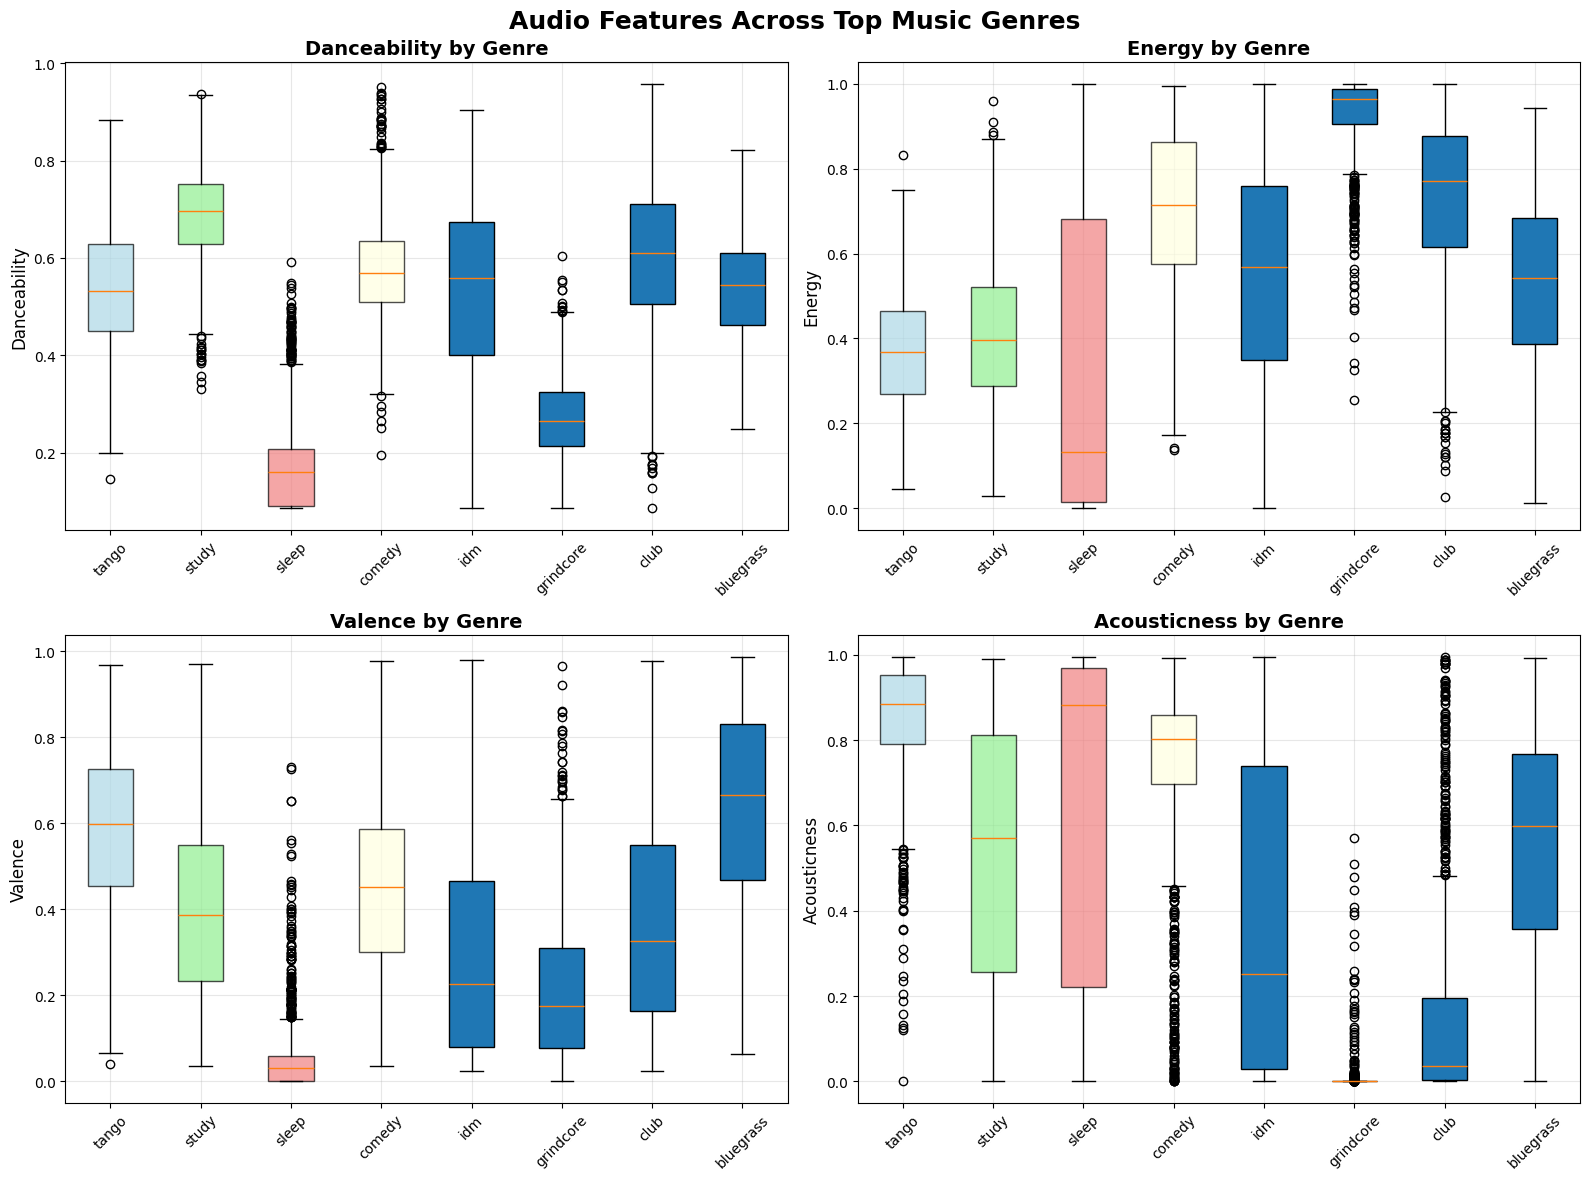

In [27]:
top_genres = df['track_genre'].value_counts().head(8).index
genre_data = df[df['track_genre'].isin(top_genres)]

fig, axes = plt.subplots(2, 2, figsize=(16, 12))
fig.suptitle('Audio Features Across Top Music Genres', fontsize=18, fontweight='bold')

features = ['danceability', 'energy', 'valence', 'acousticness']
colors = ['lightblue', 'lightgreen', 'lightcoral', 'lightyellow']

for i, feature in enumerate(features):
    row = i // 2
    col = i % 2

    box_data = [genre_data[genre_data['track_genre'] == genre][feature].dropna() for genre in top_genres]
    bp = axes[row, col].boxplot(box_data, labels=top_genres, patch_artist=True)

    for patch, color in zip(bp['boxes'], colors):
        patch.set_facecolor(color)
        patch.set_alpha(0.7)

    axes[row, col].set_title(f'{feature.title()} by Genre', fontsize=14, fontweight='bold')
    axes[row, col].set_ylabel(feature.title(), fontsize=12)
    axes[row, col].tick_params(axis='x', rotation=45)
    axes[row, col].grid(True, alpha=0.3)

plt.tight_layout()
plt.show()

# **Feature Engineering**

In [28]:
def key_cyclic_encoding() -> None:
    """Encoding the 'key' column and add two columns in dataframe."""
    df['key_sin'] = np.sin(2 * np.pi * df['key']/12)
    df['key_cos'] = np.cos(2 * np.pi * df['key']/12)

    df['key_mode'] = df['key'].astype('str') + df['mode'].astype('str')

    print("Columns formed by 'key' column : ", [col for col in df.columns if col.startswith('key')], "\n")



In [29]:
key_cyclic_encoding()

Columns formed by 'key' column :  ['key', 'key_sin', 'key_cos', 'key_mode'] 



In [30]:
def classify_duration(z):
    """
    Classify the log-duration based on the different classes.
    We used the standardized (Z-score) method.
    """
    if z < -0.3:
        return 'short'
    elif -0.3 <= z < 0.3:
        return 'normal'
    elif 0.3 <= z < 1:
        return 'mid_normal'
    elif 1 <= z < 2:
        return 'long'
    else:
        return 'very_long'



In [31]:
def feature_engineering_on_duration_col() -> None:
    """Add a minute column, class column, and one-hot encoding."""

    if 'duration_ms' in df.columns:
        # Minute Column
        df['duration_min'] = df['duration_ms'] / 60_000

        # Log transformation
        df['duration_log'] = np.log1p(df['duration_min'])

        # Standardize log-duration
        scaler = StandardScaler()
        df['duration_class'] = df['duration_log_z'] = scaler.fit_transform(df[['duration_log']])

        # Make a class
        df['duration_class'] = df['duration_log_z'].apply(classify_duration)

    print("Columns formed by 'duration' column : ", [col for col in df.columns if col.startswith('duration')], "\n")


In [32]:
feature_engineering_on_duration_col()

Columns formed by 'duration' column :  ['duration_ms', 'duration_min', 'duration_log', 'duration_class', 'duration_log_z'] 



In [33]:
def feature_engineering_on_time_signature_col():
    """
    1. Make class (1 -> Common, 0 -> Others)
    """
    df['time_signature_class_boolean'] = df['time_signature'].apply(lambda x : 1 if x in [3, 4] else 0)

    print("Columns formed by duration column : ", [col for col in df.columns if col.startswith('time_signature')], "\n")


In [34]:
feature_engineering_on_time_signature_col()

Columns formed by duration column :  ['time_signature', 'time_signature_class_boolean'] 



In [35]:
def feature_engineering_on_loudness_col():
    pt = PowerTransformer(method='yeo-johnson')
    df['loudness_yeo'] = pt.fit_transform(df[['loudness']])

    df['loudness_level'] = pd.qcut(
        df['loudness_yeo'],
        q=5,
        labels=['Very Quiet', 'Quiet', 'Normal', 'Loud', 'Very Loud']
    )

    df['loudness_intensity'] = df['energy'] * (df['loudness'] + (abs(df['loudness']).min()))


    print("Columns formed by 'loudness' column : ", [col for col in df.columns if col.startswith('loudness')], "\n")

In [36]:
feature_engineering_on_loudness_col()

Columns formed by 'loudness' column :  ['loudness', 'loudness_bins', 'loudness_yeo', 'loudness_level', 'loudness_intensity'] 



In [37]:
def feature_engineering_on_multicolumn_col():
    df['is_instrumental'] = (df['instrumentalness'] > 0.8).astype('int')
    df['is_dance_hit'] = ((df['danceability'] > 0.7840) & (df['energy'] > 0.9410)).astype('int')

    df['happy_dance'] = df['valence'] * df['danceability']
    df['acoustics_instrumental'] = df['instrumentalness'] * df['acousticness']

    print("Columns formed by multi column : ", [col for col in df.columns if col.startswith('is')], \
        "['happy_dance', , 'acoustics_instrumental'] \n" )

In [38]:
feature_engineering_on_multicolumn_col()

Columns formed by multi column :  ['is_instrumental', 'is_dance_hit'] ['happy_dance', , 'acoustics_instrumental'] 



In [39]:
def feature_engineering_on_popularity_col():
    df['popularity_level'] =  pd.qcut(
    df['popularity'],
    q=[0, 0.5, 0.8, 0.9, 0.97, 1.0],
    labels=['low', 'normal', 'medium', 'high', 'very high']
    )

    print("Columns formed by 'popularity' column : ", [col for col in df.columns if col.startswith('popularity')], "\n" )

In [40]:
feature_engineering_on_popularity_col()

Columns formed by 'popularity' column :  ['popularity', 'popularity_level'] 



In [41]:
def feature_engineering_on_artist_col():

    artists_popularity =  df.groupby(['artists'])['popularity'].mean()
    df['artists_avg_popularity'] = df['artists'].map(artists_popularity)

    df['artist_song_count'] = df['artists'].map(df['artists'].value_counts())

    print("Columns formed by 'artist' column : ", [col for col in df.columns if col.startswith('artist')], "\n" )


def feature_engineering_on_album_col():

    df['album_freq'] = df['album_name'].map(df['album_name'].value_counts())

    print("Columns formed by 'album' column : ", [col for col in df.columns if col.startswith('album')], "\n" )

In [42]:
feature_engineering_on_artist_col()

Columns formed by 'artist' column :  ['artists', 'artists_avg_popularity', 'artist_song_count'] 



In [43]:
def feature_engineering_on_tempo_col():

    df['tempo_class'] = pd.cut(
        df['tempo'],
        bins=[0, 40, 80, 180, 210, float('inf')],
        labels=['very slow', 'slow', 'normal', 'fast', 'very fast'])

    df['temp_zscore'] = (df['tempo'] - df['tempo'].mean()) / (df['tempo'].std())

    df['tempo_vs_genre'] = df['tempo'] - df.groupby('track_genre')['tempo'].transform('mean')

    print("Columns formed by 'tempo' column : ", [col for col in df.columns if col.startswith('temp')], "\n" )


def feature_engineering_on_energy_col():

    df['energy_rank_pct'] = df['energy'].rank(pct=True)

    df['loud_energy_ratio'] = (df['loudness'] + 50) / (df['energy'] + 1e-6)

    print("Columns formed by 'energy' column : ", [col for col in df.columns if 'energy' in col], "\n" )

In [44]:
feature_engineering_on_tempo_col()

Columns formed by 'tempo' column :  ['tempo', 'tempo_class', 'temp_zscore', 'tempo_vs_genre'] 



In [45]:
def pca_columns():
    pca = PCA(n_components=1)
    df['mood_pca'] = pca.fit_transform(df[['valence', 'energy', 'danceability']])

    print("Columns formed by 'pca' : ['mood_pca'] \n" )

In [46]:
pca_columns()

Columns formed by 'pca' : ['mood_pca'] 



In [47]:
def drop_col(cols):
    for col in cols:
        if col in df.columns:
            df.drop(columns=[col], inplace=True)
            print(f"'{col}' is drop.\n")
    print(f"Drop Columns are : {cols}", flush=True)


In [48]:
le = LabelEncoder()
df['track_genre'] = le.fit_transform(df['track_genre'])


In [49]:
df['explicit'] = df['explicit'].astype(int)
drop_col(['index', 'track_id','album_name', 'track_name','artists','loudness_bins','duration_ms','key_mode'])

'index' is drop.

'track_id' is drop.

'album_name' is drop.

'track_name' is drop.

'artists' is drop.

'loudness_bins' is drop.

'duration_ms' is drop.

'key_mode' is drop.

Drop Columns are : ['index', 'track_id', 'album_name', 'track_name', 'artists', 'loudness_bins', 'duration_ms', 'key_mode']


In [50]:
loudness_mapping = {'Very Quiet': 0, 'Quiet': 1, 'Normal': 2, 'Loud': 3, 'Very Loud': 4}
df['loudness_level'] = df['loudness_level'].map(loudness_mapping).astype(int)

In [51]:
tempo_mapping = {'very slow': 0, 'slow': 1, 'normal': 2, 'fast': 3, 'very fast': 4}
df['tempo_class'] = df['tempo_class'].map(tempo_mapping).astype(int)

In [52]:
pop_mapping = {'low': 0, 'normal': 1, 'medium': 2, 'high': 3, 'very high': 4}
df['popularity_level_le'] = df['popularity_level'].map(pop_mapping).astype(int)

In [53]:
le = LabelEncoder()
df['duration_class'] = le.fit_transform(df['duration_class'])

### THE Results

In [54]:
df.info()

<class 'pandas.core.frame.DataFrame'>
Index: 87604 entries, 20001 to 64885
Data columns (total 37 columns):
 #   Column                        Non-Null Count  Dtype   
---  ------                        --------------  -----   
 0   popularity                    87604 non-null  int64   
 1   explicit                      87604 non-null  int64   
 2   danceability                  87604 non-null  float64 
 3   energy                        87604 non-null  float64 
 4   key                           87604 non-null  float64 
 5   loudness                      87604 non-null  float64 
 6   mode                          87604 non-null  float64 
 7   speechiness                   87604 non-null  float64 
 8   acousticness                  87604 non-null  float64 
 9   instrumentalness              87604 non-null  float64 
 10  liveness                      87604 non-null  float64 
 11  valence                       87604 non-null  float64 
 12  tempo                         87604 non-null  f

In [55]:
pd.set_option('display.max_columns', None)
df.head()

,popularity,explicit,danceability,energy,key,loudness,mode,speechiness,acousticness,instrumentalness,liveness,valence,tempo,time_signature,track_genre,key_sin,key_cos,duration_min,duration_log,duration_class,duration_log_z,time_signature_class_boolean,loudness_yeo,loudness_level,loudness_intensity,is_instrumental,is_dance_hit,happy_dance,acoustics_instrumental,popularity_level,artists_avg_popularity,artist_song_count,tempo_class,temp_zscore,tempo_vs_genre,mood_pca,popularity_level_le
20001,100,0,0.714,0.472,2.0,-7.375,1.0,0.08640,0.01300,0.000005,0.266,0.238,131.121,4.0,20,0.866025,0.500000,2.615717,1.285290,3,-0.797152,1,0.033876,2,-3.480528,0,0,0.169932,5.863000e-08,very high,100.000000,1,2,0.300355,10.277589,-0.213258,4
51664,99,0,0.621,0.782,2.0,-5.548,1.0,0.04400,0.01250,0.033000,0.230,0.550,128.033,4.0,51,0.866025,0.500000,3.315617,1.462240,2,-0.212730,1,0.552481,3,-4.337754,0,0,0.341550,4.125000e-04,very high,99.000000,1,2,0.196878,7.987001,0.166208,4
88410,98,0,0.835,0.679,7.0,-5.329,0.0,0.03640,0.58300,0.000002,0.218,0.850,124.980,4.0,88,-0.500000,-0.866025,2.710617,1.311198,3,-0.711584,1,0.621901,3,-3.617712,0,0,0.709750,1.154340e-06,very high,98.000000,1,2,0.094574,2.308863,0.403811,4
30003,98,1,0.561,0.965,7.0,-3.673,0.0,0.03430,0.00383,0.000007,0.371,0.304,128.040,4.0,30,-0.500000,-0.866025,2.920633,1.366253,3,-0.529751,1,1.217654,4,-3.543480,0,0,0.170544,2.707810e-08,very high,45.750000,4,2,0.197113,4.852002,0.066526,4
68304,97,0,0.650,0.715,5.0,-5.198,0.0,0.16075,0.09930,0.000291,0.126,0.187,106.672,4.0,68,0.500000,-0.866025,4.061933,1.621748,1,0.314085,1,0.664317,3,-3.715855,0,0,0.121550,2.889630e-05,very high,85.363636,22,2,-0.518918,-18.352862,-0.134036,4


In [56]:
df.isnull().sum()

,0
popularity,0
explicit,0
danceability,0
energy,0
key,0
loudness,0
mode,0
speechiness,0
acousticness,0
instrumentalness,0


# **Building Models**

## **Regression**

### Linear Regression

In [57]:
df_new=df.copy()
df_new.drop(columns=['track_genre','popularity_level'], inplace=True)

# Create X(features), y(target)
X = df_new.drop(columns=['popularity'])
y = df_new['popularity']

# Train test split
X_train, X_test, y_train, y_test = train_test_split(X, y, test_size=0.2, random_state=82)
print(f"{'--'*15}  Shapes  {'--'*15}")
print(f"X --> trains size : {X_train.shape} test size : {X_test.shape}")
print(f"y --> trains size : {y_train.shape} test size : {y_test.shape} \n")

linear_model = LinearRegression()

linear_model = LinearRegression()
linear_model.fit(X_train, y_train)

# calculate the predict the model
y_pred = linear_model.predict(X_test)
y_pred_train = linear_model.predict(X_train)

train_score = linear_model.score(X_train, y_train)
test_score = linear_model.score(X_test, y_test)

print(f"{'--'*15}  Model Scores  {'--'*15}")
print(f"Training R² Score: {train_score}")
print(f"Testing R² Score: {test_score}")

print(f"{'--'*30}  \n")
print(f"{'--'*30}  \n")

------------------------------  Shapes  ------------------------------
X --> trains size : (70083, 34) test size : (17521, 34)
y --> trains size : (70083,) test size : (17521,) 

------------------------------  Model Scores  ------------------------------
Training R² Score: 0.8742925256492613
Testing R² Score: 0.8735659340798294
------------------------------------------------------------  

------------------------------------------------------------  



### **Deep Learning Regression**

In [58]:
from tensorflow.keras.models import Sequential
from tensorflow.keras.layers import Dense, LeakyReLU, Dropout
from tensorflow.keras.regularizers import l2
from tensorflow.keras.optimizers import Adam
from tensorflow.keras.callbacks import EarlyStopping
import matplotlib.pyplot as plt

In [59]:
# Step 7.1: Define features and target for regression
features = ['track_genre', 'duration_class', 'popularity_level_le',
            'loudness_level', 'tempo_class',
            'danceability', 'energy', 'loudness', 'speechiness', 'acousticness',
            'instrumentalness', 'liveness', 'valence', 'tempo',
            'key_sin', 'key_cos', 'duration_log', 'duration_log_z',
            'temp_zscore', 'loudness_intensity', 'happy_dance', 'acoustics_instrumental',
            'artists_avg_popularity', 'artist_song_count', 'album_freq',
            'tempo_vs_genre', 'energy_rank_pct', 'loud_energy_ratio', 'loudness_yeo',
            'explicit', 'mode', 'is_instrumental', 'is_dance_hit']
target = 'popularity'

# Ensure all features exist in DataFrame
features = [f for f in features if f in df.columns]

# Step 7.2: Prepare data for regression
X = df[features]
y = df[target]

# Step 7.3: Split data into training and testing sets
X_train, X_test, y_train, y_test = train_test_split(X, y, test_size=0.2, random_state=42)

# Step 7.4: Scale features
scaler = StandardScaler()
X_train_scaled = scaler.fit_transform(X_train)
X_test_scaled = scaler.transform(X_test)

# Step 7.5: Define and compile deep learning model
model = Sequential([
    Dense(256, input_shape=(X_train_scaled.shape[1],), kernel_regularizer=l2(0.001)),
    LeakyReLU(alpha=0.01),
    Dropout(0.3),
    Dense(128,kernel_regularizer=l2(0.001)),
    LeakyReLU(alpha=0.01),
    Dropout(0.3),
    Dense(64, kernel_regularizer=l2(0.001)),
    LeakyReLU(alpha=0.01),
    Dense(1)  # Output layer for regression
])

model.compile(optimizer=Adam(), loss='mse', metrics=['mae','r2_score'])

# Step 7.6: Train the model with early stopping
early_stopping = EarlyStopping(monitor='val_loss', patience=20, restore_best_weights=True)
history = model.fit(X_train_scaled, y_train,
                    validation_data=(X_test_scaled, y_test),
                    epochs=200,
                    batch_size=32,
                    callbacks=[early_stopping],
                    verbose=1)

# Step 7.7: Make predictions
y_train_pred = model.predict(X_train_scaled).flatten()
y_test_pred = model.predict(X_test_scaled).flatten()

# Step 7.8: Evaluate model with MSE, MAE, and R²
train_mse = mean_squared_error(y_train, y_train_pred)
test_mse = mean_squared_error(y_test, y_test_pred)
train_mae = mean_absolute_error(y_train, y_train_pred)
test_mae = mean_absolute_error(y_test, y_test_pred)
train_r2 = r2_score(y_train, y_train_pred)
test_r2 = r2_score(y_test, y_test_pred)




/usr/local/lib/python3.11/dist-packages/keras/src/layers/core/dense.py:87: UserWarning: Do not pass an `input_shape`/`input_dim` argument to a layer. When using Sequential models, prefer using an `Input(shape)` object as the first layer in the model instead.
  super().__init__(activity_regularizer=activity_regularizer, **kwargs)
/usr/local/lib/python3.11/dist-packages/keras/src/layers/activations/leaky_relu.py:41: UserWarning: Argument `alpha` is deprecated. Use `negative_slope` instead.
  warnings.warn(


Epoch 1/200
2191/2191 ━━━━━━━━━━━━━━━━━━━━ 6s 2ms/step - loss: 178.3030 - mae: 8.7741 - r2_score: 0.5620 - val_loss: 38.7018 - val_mae: 4.2289 - val_r2_score: 0.9043
Epoch 2/200
2191/2191 ━━━━━━━━━━━━━━━━━━━━ 4s 2ms/step - loss: 51.2161 - mae: 5.1689 - r2_score: 0.8745 - val_loss: 32.7552 - val_mae: 3.7746 - val_r2_score: 0.9193
Epoch 3/200
2191/2191 ━━━━━━━━━━━━━━━━━━━━ 5s 2ms/step - loss: 43.9484 - mae: 4.7267 - r2_score: 0.8942 - val_loss: 30.9754 - val_mae: 3.7048 - val_r2_score: 0.9238
Epoch 4/200
2191/2191 ━━━━━━━━━━━━━━━━━━━━ 5s 2ms/step - loss: 40.9211 - mae: 4.5192 - r2_score: 0.9013 - val_loss: 31.3517 - val_mae: 3.8365 - val_r2_score: 0.9230
Epoch 5/200
2191/2191 ━━━━━━━━━━━━━━━━━━━━ 6s 2ms/step - loss: 37.9921 - mae: 4.3186 - r2_score: 0.9072 - val_loss: 30.2980 - val_mae: 3.7586 - val_r2_score: 0.9256
Epoch 6/200
2191/2191 ━━━━━━━━━━━━━━━━━━━━ 5s 2ms/step - loss: 36.1516 - mae: 4.1919 - r2_score: 0.9125 - val_loss: 27.9421 - val_mae: 3.4362 - val_r2_score: 0.9315
Epoch 7/2

In [60]:
# Step 7.9: Print evaluation metrics
print(f"\nTraining MSE: {train_mse:.4f}, MAE: {train_mae:.4f}, R²: {train_r2:.4f}")
print(f"Testing MSE: {test_mse:.4f}, MAE: {test_mae:.4f}, R²: {test_r2:.4f}")


Training MSE: 21.5954, MAE: 2.9920, R²: 0.9470
Testing MSE: 23.5067, MAE: 3.0616, R²: 0.9413


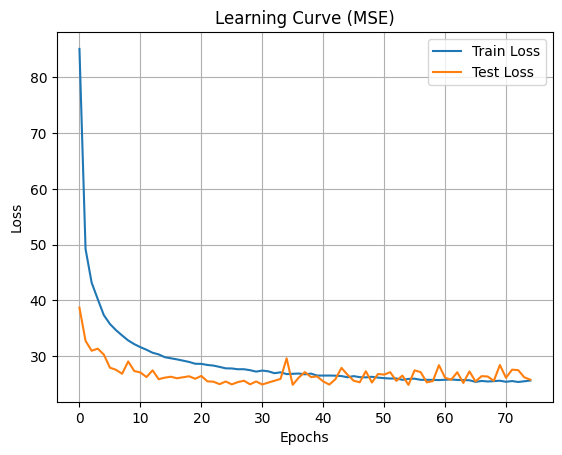

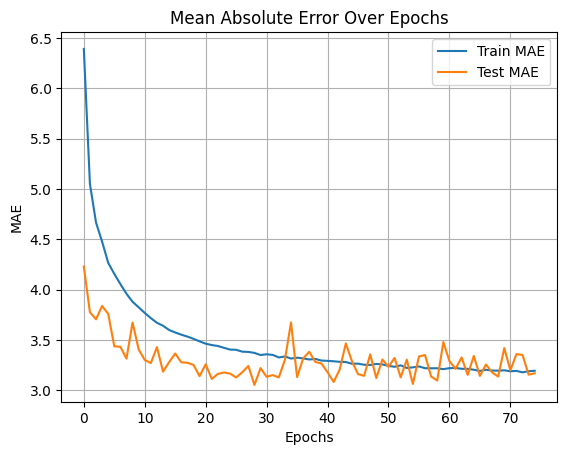

In [61]:
# Plot training vs validation loss
plt.plot(history.history['loss'], label='Train Loss')
plt.plot(history.history['val_loss'], label='Test Loss')
plt.title('Learning Curve (MSE)')
plt.xlabel('Epochs'); plt.ylabel('Loss')
plt.legend(); plt.grid(True); plt.show()

# Plot MAE (accuracy proxy in regression)
plt.plot(history.history['mae'], label='Train MAE')
plt.plot(history.history['val_mae'], label='Test MAE')
plt.title('Mean Absolute Error Over Epochs')
plt.xlabel('Epochs'); plt.ylabel('MAE')
plt.legend(); plt.grid(True); plt.show()


## **Classification**

### Deep Learning

In [62]:
from sklearn.metrics import accuracy_score, precision_score, recall_score, f1_score, classification_report
from sklearn.model_selection import train_test_split, StratifiedKFold
from sklearn.preprocessing import StandardScaler
from tensorflow.keras.models import Sequential
from tensorflow.keras.layers import Dense, LeakyReLU, Dropout, BatchNormalization
from tensorflow.keras.regularizers import l2
from tensorflow.keras.optimizers import Adam
from tensorflow.keras.callbacks import EarlyStopping, ReduceLROnPlateau ,LearningRateScheduler
from tensorflow.keras.utils import to_categorical
from imblearn.over_sampling import SMOTE
from scipy.stats import spearmanr
from sklearn.utils.class_weight import compute_class_weight

In [95]:
# Learning rate warm-up scheduler
def lr_warmup(epoch, lr):
    warmup_epochs = 10
    initial_lr = 0.0001
    target_lr = 0.001
    if epoch < warmup_epochs:
        return initial_lr + (target_lr - initial_lr) * epoch / warmup_epochs
    return lr

# Define all numerical features (excluding popularity_level)
features = [col for col in df.columns if df[col].dtype in ['int64', 'float64', 'int32'] and col not in ['popularity_level', 'popularity_level_le']]
target = 'popularity_level_le'



X = df[features]
y = df[target]

# Convert target to categorical for multiclass classification
num_classes = len(df[target].unique())
y_categorical = to_categorical(y, num_classes=num_classes)


# Apply SMOTE to handle class imbalance
smote = SMOTE(random_state=42)
X_resampled, y_resampled = smote.fit_resample(X, y)
y_resampled_categorical = to_categorical(y_resampled, num_classes=num_classes)
print(f"Dataset size after SMOTE: {len(X_resampled)} rows")

# Train-test split
X_train, X_test, y_train, y_test = train_test_split(X_resampled, y_resampled_categorical, test_size=0.2, random_state=42, stratify=y_resampled_categorical)


# Standardize
scaler = StandardScaler()
X_train_scaled = scaler.fit_transform(X_train)
X_test_scaled = scaler.transform(X_test)

# Define k-fold cross-validation
n_splits = 2
skf = StratifiedKFold(n_splits=n_splits, shuffle=True, random_state=42)

# Initialize lists to store metrics
train_accuracies = []
val_accuracies = []
histories = []
best_val_acc = 0
best_fold = 0
best_history = None

# Define model creation function
def create_model(input_shape, num_classes):
    model = Sequential([
        Dense(128, input_shape=(input_shape,), kernel_regularizer=l2(0.01)),
        BatchNormalization(),
        LeakyReLU(alpha=0.01),
        Dropout(0.25),
        Dense(64, kernel_regularizer=l2(0.01)),
        BatchNormalization(),
        LeakyReLU(alpha=0.01),
        Dropout(0.25),
        Dense(32, kernel_regularizer=l2(0.01)),
        LeakyReLU(alpha=0.01),
        Dense(num_classes, activation='softmax')
    ])
    model.compile(optimizer=Adam(learning_rate=0.0001),  # Initial LR for warm-up
                  loss='categorical_crossentropy',
                  metrics=['accuracy'])
    return model


# Cross-validation training
for fold, (train_idx, val_idx) in enumerate(skf.split(X_train_scaled, np.argmax(y_train, axis=1))):
    print(f"\nTraining Fold {fold + 1}/{n_splits}")
    X_fold_train, X_fold_val = X_train_scaled[train_idx], X_train_scaled[val_idx]
    y_fold_train, y_fold_val = y_train[train_idx], y_train[val_idx]

    # Create model
    model = create_model(X_train_scaled.shape[1], num_classes)

    # Define callbacks
    early_stopping = EarlyStopping(monitor='val_loss', patience=30, restore_best_weights=True)
    lr_scheduler = ReduceLROnPlateau(monitor='val_loss', factor=0.5, patience=5, min_lr=1e-6, verbose=1)
    lr_warmup_scheduler = LearningRateScheduler(lr_warmup, verbose=1)

    # Train
    history = model.fit(X_fold_train, y_fold_train,
                        validation_data=(X_fold_val, y_fold_val),
                        epochs=200,
                        batch_size=128,
                        callbacks=[early_stopping, lr_warmup_scheduler, lr_scheduler],
                        verbose=1)

    # Store history
    histories.append(history)

    # Evaluate
    train_loss, train_acc = model.evaluate(X_fold_train, y_fold_train, verbose=0)
    val_loss, val_acc = model.evaluate(X_fold_val, y_fold_val, verbose=0)
    train_accuracies.append(train_acc)
    val_accuracies.append(val_acc)

    print(f"Fold {fold + 1} - Train Accuracy: {train_acc:.4f}, Validation Accuracy: {val_acc:.4f}")

    # Track best fold
    if val_acc > best_val_acc:
        best_val_acc = val_acc
        best_fold = fold + 1
        best_history = history
        best_train_acc = train_acc

    # For the last fold, evaluate on test set
    if fold == n_splits - 1:
        y_test_pred = model.predict(X_test_scaled)
        y_test_pred_classes = np.argmax(y_test_pred, axis=1)
        y_test_true = np.argmax(y_test, axis=1)
        test_accuracy = accuracy_score(y_test_true, y_test_pred_classes)



Dataset size after SMOTE: 221355 rows

Training Fold 1/2

Epoch 1: LearningRateScheduler setting learning rate to 0.0001.
Epoch 1/200


/usr/local/lib/python3.11/dist-packages/keras/src/layers/core/dense.py:87: UserWarning: Do not pass an `input_shape`/`input_dim` argument to a layer. When using Sequential models, prefer using an `Input(shape)` object as the first layer in the model instead.
  super().__init__(activity_regularizer=activity_regularizer, **kwargs)
/usr/local/lib/python3.11/dist-packages/keras/src/layers/activations/leaky_relu.py:41: UserWarning: Argument `alpha` is deprecated. Use `negative_slope` instead.
  warnings.warn(


692/692 ━━━━━━━━━━━━━━━━━━━━ 5s 4ms/step - accuracy: 0.3256 - loss: 3.1870 - val_accuracy: 0.5882 - val_loss: 2.2510 - learning_rate: 1.0000e-04

Epoch 2: LearningRateScheduler setting learning rate to 0.00019.
Epoch 2/200
692/692 ━━━━━━━━━━━━━━━━━━━━ 4s 3ms/step - accuracy: 0.6414 - loss: 1.9485 - val_accuracy: 0.9024 - val_loss: 1.0390 - learning_rate: 1.9000e-04

Epoch 3: LearningRateScheduler setting learning rate to 0.00028.
Epoch 3/200
692/692 ━━━━━━━━━━━━━━━━━━━━ 3s 4ms/step - accuracy: 0.8432 - loss: 0.9524 - val_accuracy: 0.9655 - val_loss: 0.4887 - learning_rate: 2.8000e-04

Epoch 4: LearningRateScheduler setting learning rate to 0.00037.
Epoch 4/200
692/692 ━━━━━━━━━━━━━━━━━━━━ 5s 3ms/step - accuracy: 0.8765 - loss: 0.5578 - val_accuracy: 0.9776 - val_loss: 0.3030 - learning_rate: 3.7000e-04

Epoch 5: LearningRateScheduler setting learning rate to 0.00045999999999999996.
Epoch 5/200
692/692 ━━━━━━━━━━━━━━━━━━━━ 2s 3ms/step - accuracy: 0.8939 - loss: 0.4072 - val_accuracy: 0.

In [100]:
print(f"Model Train Accuracy: {best_train_acc:.4f}")
print(f"Model Test Accuracy: {test_accuracy:.4f}")
print("\nClassification Report (Test Set, Last Fold):")
print(classification_report(y_test_true, y_test_pred_classes, target_names=['low', 'normal', 'medium', 'high', 'very high']))


Model Train Accuracy: 0.9917
Model Test Accuracy: 0.9892

Classification Report (Test Set, Last Fold):
              precision    recall  f1-score   support

         low       0.99      0.99      0.99      8854
      normal       0.99      0.97      0.98      8855
      medium       0.98      0.99      0.99      8854
        high       0.99      0.99      0.99      8854
   very high       0.99      1.00      1.00      8854

    accuracy                           0.99     44271
   macro avg       0.99      0.99      0.99     44271
weighted avg       0.99      0.99      0.99     44271



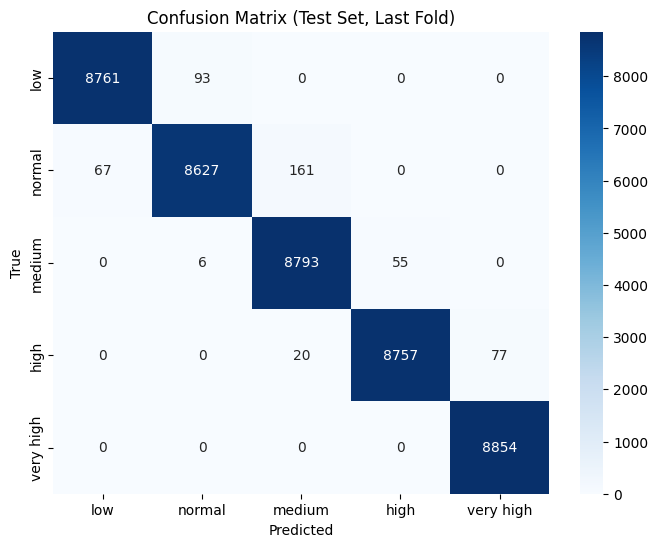

In [101]:
# Plot confusion matrix
cm = confusion_matrix(y_test_true, y_test_pred_classes)
plt.figure(figsize=(8, 6))
sns.heatmap(cm, annot=True, fmt='d', cmap='Blues', xticklabels=['low', 'normal', 'medium', 'high', 'very high'], yticklabels=['low', 'normal', 'medium', 'high', 'very high'])
plt.title('Confusion Matrix (Test Set, Last Fold)')
plt.xlabel('Predicted')
plt.ylabel('True')
plt.show()

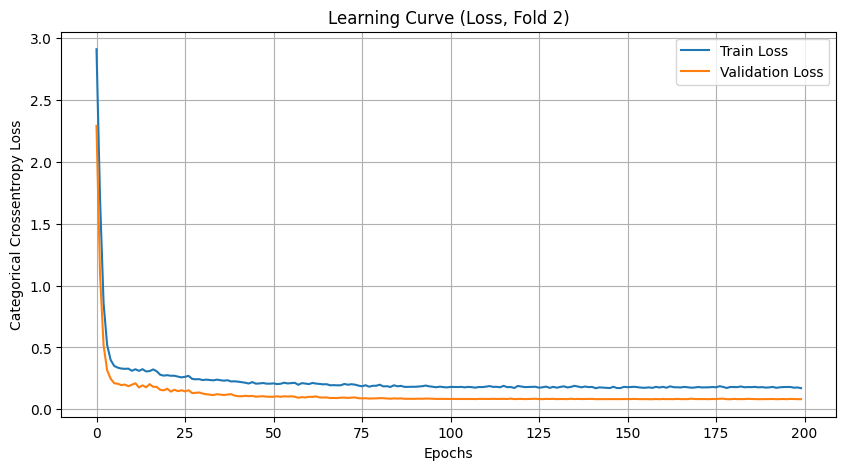

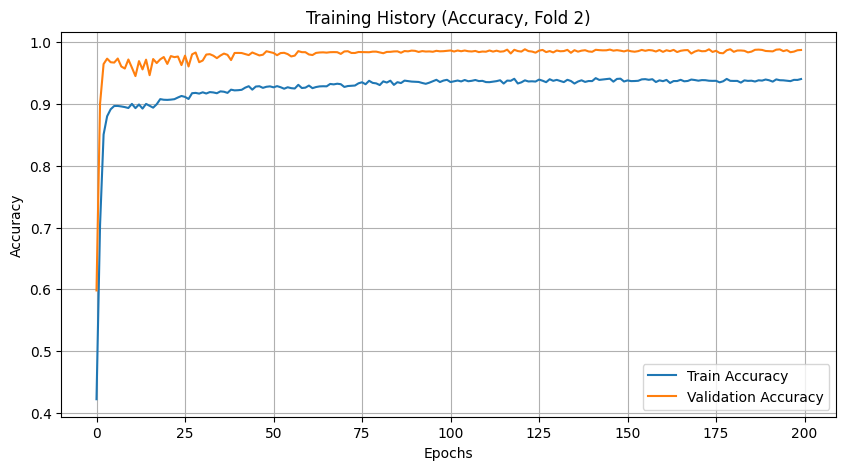

In [102]:
# Plot learning curve
plt.figure(figsize=(10, 5))
plt.plot(best_history.history['loss'], label='Train Loss')
plt.plot(best_history.history['val_loss'], label='Validation Loss')
plt.title(f'Learning Curve (Loss, Fold {best_fold})')
plt.xlabel('Epochs')
plt.ylabel('Categorical Crossentropy Loss')
plt.legend()
plt.grid(True)
plt.show()

# Plot training history (accuracy)
plt.figure(figsize=(10, 5))
plt.plot(best_history.history['accuracy'], label='Train Accuracy')
plt.plot(best_history.history['val_accuracy'], label='Validation Accuracy')
plt.title(f'Training History (Accuracy, Fold {best_fold})')
plt.xlabel('Epochs')
plt.ylabel('Accuracy')
plt.legend()
plt.grid(True)
plt.show()